In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/my-dataset/credit_train.csv
/kaggle/input/my-dataset/credit_test.csv


In [37]:
##### # Imports

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [38]:
 # # Data Cleaning and Formatting

# # Load in the Data and Examine

# Read in credit into a dataframe 
credit = pd.read_csv('../input/my-dataset/credit_train.csv')

# Display top of dataframe
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [39]:
credit.shape

(100514, 19)

In [40]:
credit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

# These two features are only for identification.

In [41]:
# # Data Types and Missing Values

# See the column data types and non-missing values
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maximum Open Credit             99998 non-null float64
Bankruptcies                    99796 non-null float64
Tax 

In [42]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [43]:
missing_values_table(credit)

Your selected dataframe has 17 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5
Number of Open Accounts,514,0.5


In [44]:
credit.drop(credit.tail(514).index, inplace=True) # drop last 514 rows
missing_values_table(credit)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53141,53.1
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [45]:
data_without_ms = credit.dropna()

In [46]:
data_without_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 17 columns):
Loan Status                     36423 non-null object
Current Loan Amount             36423 non-null float64
Term                            36423 non-null object
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null object
Home Ownership                  36423 non-null object
Purpose                         36423 non-null object
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens       

In [47]:
## caregorical data to numerical

data_without_ms['Loan Status'] = data_without_ms['Loan Status'].map({'Fully Paid':int('0'),'Charged Off':int('1')})
data_without_ms['Term'] = data_without_ms['Term'].map({'Short Term':int('0'),'Long Term':int('1')})
data_without_ms['Years in current job'] = data_without_ms['Years in current job'].map({'< 1 year':int('0'),'1 year':int('1'),'2 years':int('2'),'3 years':int('3'),'4 years':int('4'),'5 years':int('5'),'6 years':int('6'),'7 years':int('7'),'8 years':int('8'),'9 years':int('9'),'10+ years':int('10')})


In [48]:
# # Encoding categorical data & Feature Scaling

# Select the categorical columns
categorical_subset = data_without_ms[[ 'Home Ownership', 'Purpose']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the dataframe in credit_train
# Make sure to use axis = 1 to perform a column bind
# First I will drop the 'old' categorical datas and after I will join the 'new' one.

data_without_ms.drop(labels=['Home Ownership', 'Purpose'], axis=1, inplace=True)
data_without_ms = pd.concat([data_without_ms, categorical_subset], axis = 1)

In [49]:
data_without_ms.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
2,0,99999999.0,0,741.0,2231892.0,8,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,217646.0,0,730.0,1184194.0,0,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,548746.0,0,678.0,2559110.0,2,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10,0,99999999.0,0,728.0,714628.0,3,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12,0,99999999.0,0,740.0,776188.0,0,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
data_without_ms.shape

(36423, 35)

**Handling under sampling**

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import math

def generate_model_report(y_actual, y_predicted):
    
    conf_mat = confusion_matrix(y_actual, y_predicted) 
    true_positive = conf_mat[1,1]
    true_negative = conf_mat[0,0]
    false_positive = conf_mat[0,1]
    false_negative = conf_mat[1,0]
    specificity = (true_negative)/(true_negative + false_positive)
    gm = math.sqrt(specificity * recall_score(y_actual, y_predicted))
    
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall/Sensitivity = " ,recall_score(y_actual, y_predicted))
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    print("ROC-AUC Score = " ,roc_auc_score(y_actual, y_predicted))
    print("G-Measure = " ,gm)
    
    sns.heatmap(conf_mat,cmap="coolwarm_r", annot=True,linewidths=0.5,fmt='g')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted value")
    plt.ylabel("Actual label")
    plt.show()
    pass

minority_class_len = len(data_without_ms[data_without_ms['Loan Status'] == 1])
print(minority_class_len)

majority_class_indices = data_without_ms[data_without_ms['Loan Status'] == 0].index
print(majority_class_indices)

random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

minority_class_indices = data_without_ms[data_without_ms['Loan Status'] == 1].index
print(minority_class_indices)

under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
#under_sample = data_without_ms.loc[under_sample_indices]
data_without_ms = data_without_ms.loc[under_sample_indices]



7451
Int64Index([    2,     6,     8,    10,    12,    14,    17,    25,    28,
               39,
            ...
            99970, 99971, 99974, 99983, 99985, 99990, 99993, 99994, 99996,
            99997],
           dtype='int64', length=28972)
7451
Int64Index([   20,    40,    51,    53,    55,    60,    88,    97,   102,
              106,
            ...
            99843, 99853, 99863, 99872, 99894, 99915, 99919, 99950, 99975,
            99981],
           dtype='int64', length=7451)


In [52]:

def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC  ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

logistic regression


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =  0.6306608520630661
Precision =  0.6119228521332554
Recall/Sensitivity =  0.7055256064690026
Specificity =  0.5564462257849031
F1 Score =  0.6553990610328637
ROC-AUC Score =  0.630985916126953
G-Measure =  0.6265676826283665


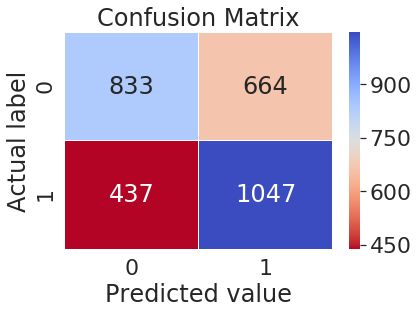

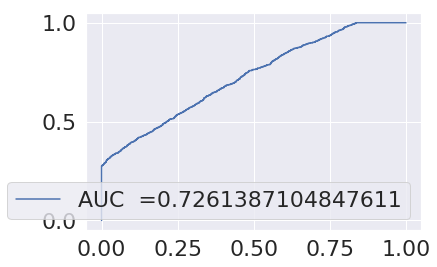

In [53]:
print("logistic regression")
X = data_without_ms.loc[:, data_without_ms.columns!='Loan Status']
Y = data_without_ms.loc[:, data_without_ms.columns=='Loan Status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)


KNN


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy =  0.5686011405568601
Precision =  0.5629770992366412
Recall/Sensitivity =  0.5963611859838275
Specificity =  0.5410821643286573
F1 Score =  0.5791884816753926
ROC-AUC Score =  0.5687216751562423
G-Measure =  0.5680496468036349


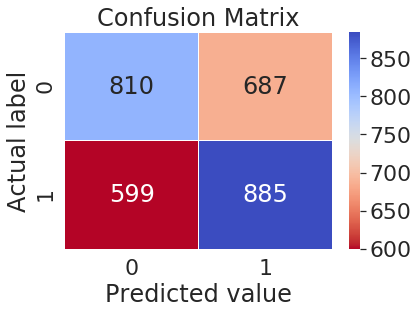

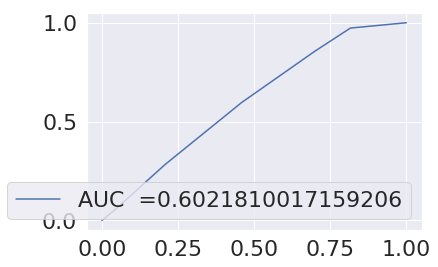

In [54]:
from sklearn.neighbors import KNeighborsClassifier
print("KNN")

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, Y_train)

Y_Test_Pred = clf.predict(X_test)

generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

Decision Tree
Accuracy =  0.666219389466622
Precision =  0.6694386694386695
Recall/Sensitivity =  0.6509433962264151
Specificity =  0.6813627254509018
F1 Score =  0.6600614964127093
ROC-AUC Score =  0.6661530608386584
G-Measure =  0.6659794040111875


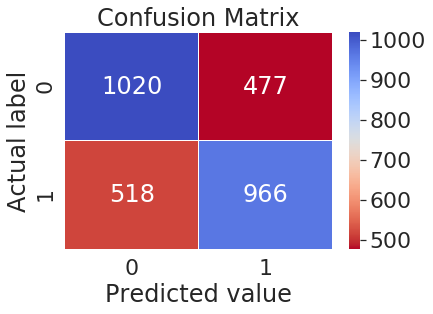

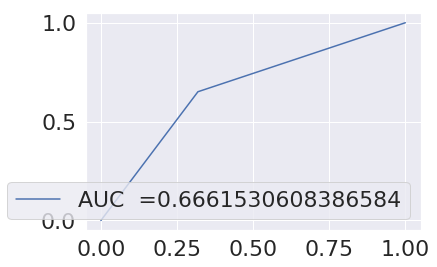

In [55]:
from sklearn import tree
print("Decision Tree")

clf = tree.DecisionTreeClassifier(random_state=1).fit(X_train, Y_train)

Y_Test_Pred = clf.predict(X_test)

generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

Naive bayes
Accuracy =  0.5806776249580677
Precision =  0.5431734317343173
Recall/Sensitivity =  0.9919137466307277
Specificity =  0.1730126920507682
F1 Score =  0.7019551740581783
ROC-AUC Score =  0.582463219340748
G-Measure =  0.41426280014834277


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


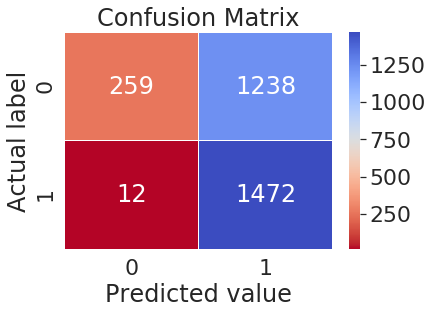

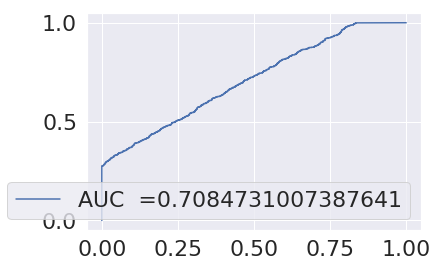

In [56]:
print("Naive bayes")
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train, Y_train)

Y_Test_Pred = clf.predict(X_test)

generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

Random forest


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy =  0.6658839315665884
Precision =  0.7125435540069687
Recall/Sensitivity =  0.5512129380053908
Specificity =  0.779559118236473
F1 Score =  0.6215805471124619
ROC-AUC Score =  0.6653860281209318
G-Measure =  0.6555174077871755


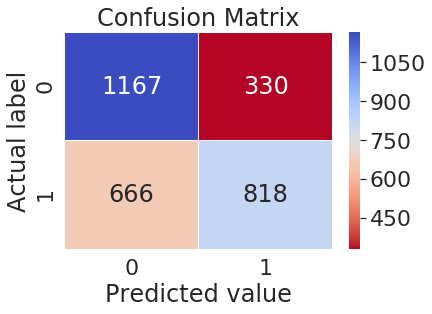

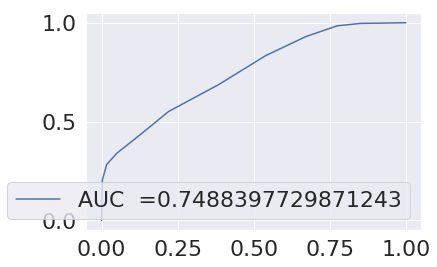

In [57]:
print("Random forest")
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy').fit(X_train, Y_train)

Y_Test_Pred = clf.predict(X_test)

generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

XGBoost


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy =  0.6930560214693056
Precision =  0.7140707298720843
Recall/Sensitivity =  0.639487870619946
Specificity =  0.7461589846359385
F1 Score =  0.6747244934233915
ROC-AUC Score =  0.6928234276279424
G-Measure =  0.6907674139888023


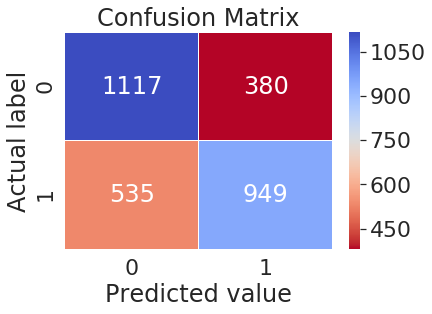

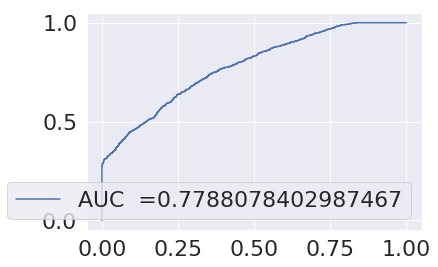

In [58]:
print("XGBoost")
from xgboost import XGBClassifier

clf = XGBClassifier().fit(X_train, Y_train)

Y_Test_Pred = clf.predict(X_test)

generate_model_report(Y_test, Y_Test_Pred)
generate_auc_roc_curve(clf, X_test)

# k-flod

In [59]:
 # # Split Into Training and Testing Sets

# Separate out the features and targets
features = data_without_ms.drop(columns='Loan Status')
targets = pd.DataFrame(data_without_ms['Loan Status'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 16)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11921, 34)
(2981, 34)
(11921, 1)
(2981, 1)


In [60]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
# # # Models to Evaluate

# We will compare five different machine learning Classification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
      
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10, verbose = 2)
    return accuracies.mean()


def confusion_metrix(X_train, y_train, model):
    
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import f1_score, roc_auc_score, roc_curve
    import math
    
    ## confusion metrix 
    from sklearn.metrics import confusion_matrix
    y_pred = cross_val_predict(model, X_train, y_train, cv=3)
    conf_mat = confusion_matrix(y_train, y_pred) 
    true_positive = conf_mat[1,1]
    true_negative = conf_mat[0,0]
    false_positive = conf_mat[0,1]
    false_negative = conf_mat[1,0]
    specificity = (true_negative)/(true_negative + false_positive)
    gm = math.sqrt(specificity * recall_score(y_train, y_pred))
    
   

    print("Accuracy = " , accuracy_score(y_train, y_pred))
    print("Precision = " ,precision_score(y_train, y_pred))
    print("Recall/ Sensitivity = " ,recall_score(y_train, y_pred))
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_train, y_pred))
    print("ROC-AUC Score = " ,roc_auc_score(y_train, y_pred))
    print("G-Measure = " ,gm)
    return conf_mat


# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    #model.fit(X_train, y_train)
    
    # Make predictions and evalute
    #model_pred = model.predict(X_test)
    model_acc_cross = cross_val(X_train, y_train, model)
    print ("print accuracy is ",model_acc_cross)
    
    con_matrix = confusion_metrix(X_train, y_train, model)
    print ("print confusion metrix is ",con_matrix)
    sns.heatmap(con_matrix,cmap="coolwarm_r", annot=True,linewidths=0.5,fmt='g')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted value")
    plt.ylabel("Actual label")
    plt.show()

    
    # Return the performance metric
    return model_acc_cross

In [62]:
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished


Accuracy =  0.6421441154265581
Precision =  0.6428329952670724
Recall/ Sensitivity =  0.6385157824042982
Specificity =  0.645766974015088
F1 Score =  0.640667115902965
ROC-AUC Score =  0.642141378209693
G-Measure =  0.6421311428860151
print confusion metrix is  [[3852 2113]
 [2153 3803]]


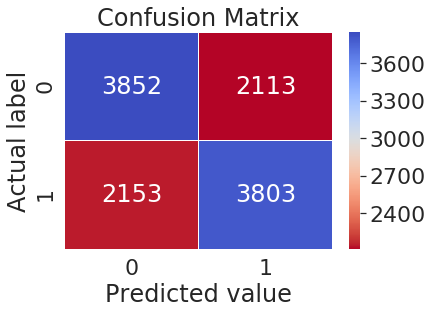

Decision tree Performance on the test set: Cross Validation Score = 0.6429


In [63]:
# # Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=1) 
dt_cross = fit_and_evaluate(dt)

print('Decision tree Performance on the test set: Cross Validation Score = %0.4f' % dt_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.3s finished


Accuracy =  0.6294773928361714
Precision =  0.6364603653129988
Recall/ Sensitivity =  0.6025856279382136
Specificity =  0.6563285834031852
F1 Score =  0.6190599396291505
ROC-AUC Score =  0.6294571056706995
G-Measure =  0.6288832734011985
print confusion metrix is  [[3915 2050]
 [2367 3589]]


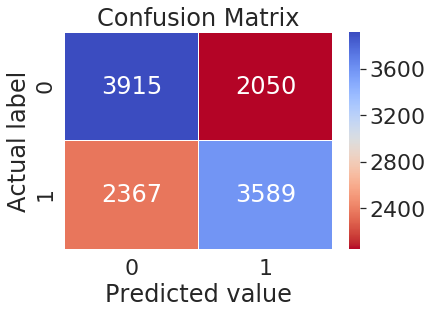

KNN Performance on the test set: Cross Validation Score = 0.6324


In [64]:
# # K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.7s finished


Accuracy =  0.6267091686939015
Precision =  0.6294259195599863
Recall/ Sensitivity =  0.6148421759570182
Specificity =  0.638558256496228
F1 Score =  0.6220485816205199
ROC-AUC Score =  0.6267002162266231
G-Measure =  0.6265880208713381
print confusion metrix is  [[3809 2156]
 [2294 3662]]


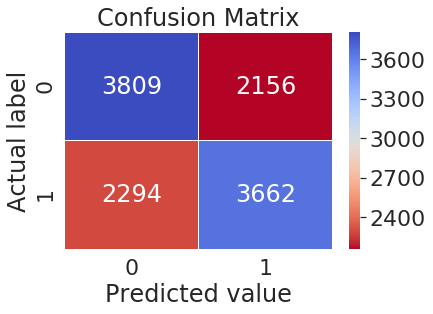

KNN Performance on the test set: Cross Validation Score = 0.6314


In [65]:
# # K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] ................................................. , total=   0.9s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.1s finished


Accuracy =  0.6329167016189917
Precision =  0.6931540342298288
Recall/ Sensitivity =  0.4759905977165883
Specificity =  0.7896060352053647
F1 Score =  0.5644037427831973
ROC-AUC Score =  0.6327983164609765
G-Measure =  0.6130620267624044
print confusion metrix is  [[4710 1255]
 [3121 2835]]


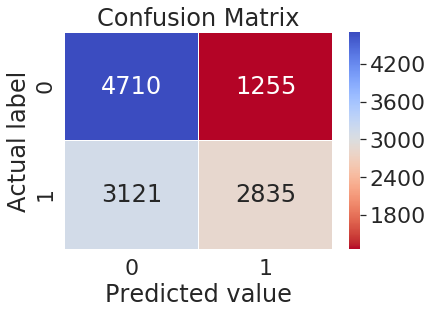

KNN Performance on the test set: Cross Validation Score = 0.6364


In [66]:
# # K-NN
# used eclbian distance
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................................................. , total=   0.1s
print accuracy is  0.6685681406725369


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy =  0.6675614461874004
Precision =  0.6945149326566465
Recall/ Sensitivity =  0.5973807924781732
Specificity =  0.7376362112321878
F1 Score =  0.6422962361223937
ROC-AUC Score =  0.6675085018551804
G-Measure =  0.6638145105573405
print confusion metrix is  [[4400 1565]
 [2398 3558]]


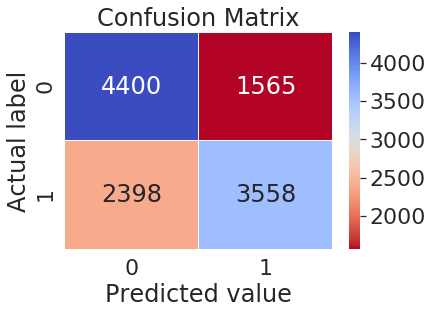

Logistic Regression Performance on the test set: Cross Validation Score = 0.6686


In [67]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] ................................................. , total=   0.4s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.7s finished


Accuracy =  0.6610183709420351
Precision =  0.7017913593256059
Recall/ Sensitivity =  0.5591000671591673
Specificity =  0.7627829002514669
F1 Score =  0.6223717409587889
ROC-AUC Score =  0.6609414837053171
G-Measure =  0.6530482147272585
print confusion metrix is  [[4550 1415]
 [2626 3330]]


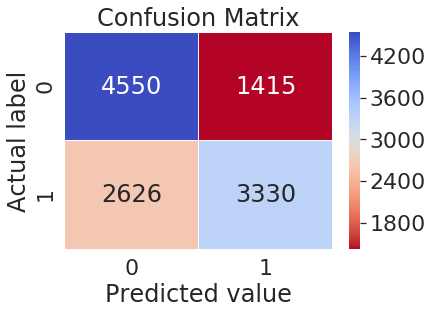

Random Forest Performance on the test set: Cross Validation Score = 0.6642


In [68]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   1.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   14.8s finished


Accuracy =  0.6859323882224646
Precision =  0.713926499032882
Recall/ Sensitivity =  0.6197112155809268
Specificity =  0.7520536462699078
F1 Score =  0.6634909221642998
ROC-AUC Score =  0.6858824309254172
G-Measure =  0.6826830006027635
print confusion metrix is  [[4486 1479]
 [2265 3691]]


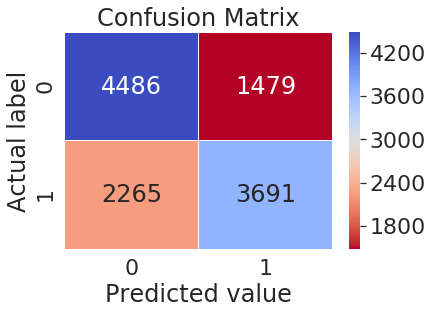

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.6873


In [69]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


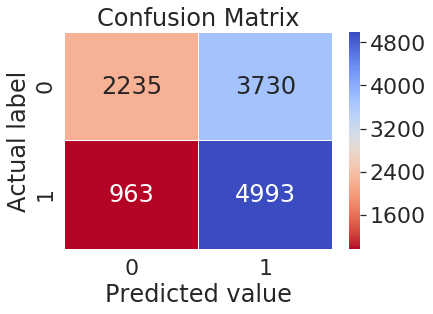

Naive Bayes Performance on the test set: Cross Validation Score = 0.6097


In [70]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)